<a href="https://colab.research.google.com/github/Kanikasr/Stock-Prediction-Regression-Model/blob/main/stock_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** - Kanika Singh Rajpoot


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load Dataset

file_path = "/content/drive/My Drive/projects/yes_bank/data_YesBank_StockPrices.csv"

# Read CSV (don't parse dates yet)
raw = pd.read_csv(file_path, dtype=str)
print("Raw shape:", raw.shape)
print("Columns:", raw.columns.tolist())
print("First 5 rows:\n", raw.head().to_string(index=False))


Raw shape: (185, 5)
Columns: ['Date', 'Open', 'High', 'Low', 'Close']
First 5 rows:
   Date  Open  High   Low Close
Jul-05    13    14 11.25 12.46
Aug-05 12.58 14.88 12.55 13.42
Sep-05 13.48 14.87 12.27  13.3
Oct-05  13.2 14.47  12.4 12.99
Nov-05 13.35 13.88 12.88 13.41


**2. Cleaning Date**

In [ ]:
# ---------------------------
# 2. Clean Date & numeric columns robustly
# ---------------------------
# Trim column names/spaces
raw.columns = raw.columns.str.strip()


In [ ]:
# Remove rows that are completely empty
raw = raw.dropna(how='all')

In [ ]:
# Ensure expected columns exist
expected = ['Date', 'Open', 'High', 'Low', 'Close']
missing = [c for c in expected if c not in raw.columns]
if missing:
    raise RuntimeError(f"Missing columns in CSV: {missing} — fix CSV or rename columns accordingly.")


In [ ]:
# Clean numeric columns: remove commas, stray spaces, convert to numeric
for col in ['Open','High','Low','Close']:
    raw[col] = raw[col].astype(str).str.replace(',', '').str.strip()
    raw[col] = pd.to_numeric(raw[col], errors='coerce')

In [ ]:
# Parse Date column: your data uses "%b-%y" (e.g. "Jul-05")
# Try strict first; if fails fallback to more permissive parsing
try:
    raw['Date'] = pd.to_datetime(raw['Date'], format='%b-%y', errors='raise')
except Exception as e:
    print("Strict parse failed (will fallback). Err:", e)
    raw['Date'] = pd.to_datetime(raw['Date'], errors='coerce')

In [ ]:
# Drop rows where Date or Close is NaN (we cannot train with those)
clean = raw.dropna(subset=['Date','Close']).copy()
clean['Date'] = clean['Date'].dt.to_period('M').dt.to_timestamp()  # normalize to month-start

In [ ]:
# Sort & set index
clean = clean.sort_values('Date').drop_duplicates(subset=['Date'])
clean.set_index('Date', inplace=True)

In [ ]:
print("\nCLEAN shape:", clean.shape)
print(clean.head())
print(clean.tail())
print("Date range:", clean.index.min(), "→", clean.index.max())

# Save cleaned minimal CSV for Streamlit / later use
clean.reset_index().to_csv("data.csv", index=False)
print("\nSaved cleaned data to data.csv")
# from google.colab import files
# files.download("data.csv")


CLEAN shape: (185, 4)
             Open   High    Low  Close
Date                                  
2005-07-01  13.00  14.00  11.25  12.46
2005-08-01  12.58  14.88  12.55  13.42
2005-09-01  13.48  14.87  12.27  13.30
2005-10-01  13.20  14.47  12.40  12.99
2005-11-01  13.35  13.88  12.88  13.41
             Open   High    Low  Close
Date                                  
2020-07-01  25.60  28.30  11.10  11.95
2020-08-01  12.00  17.16  11.85  14.37
2020-09-01  14.30  15.34  12.75  13.15
2020-10-01  13.30  14.01  12.11  12.42
2020-11-01  12.41  14.90  12.21  14.67
Date range: 2005-07-01 00:00:00 → 2020-11-01 00:00:00

Saved cleaned data to data.csv


**3. EDA VISUALIZATION CODE**

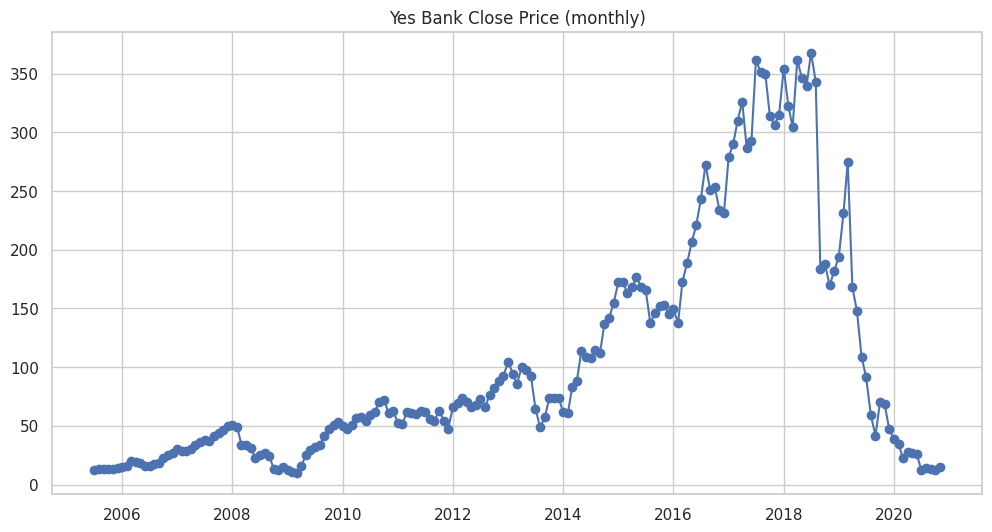

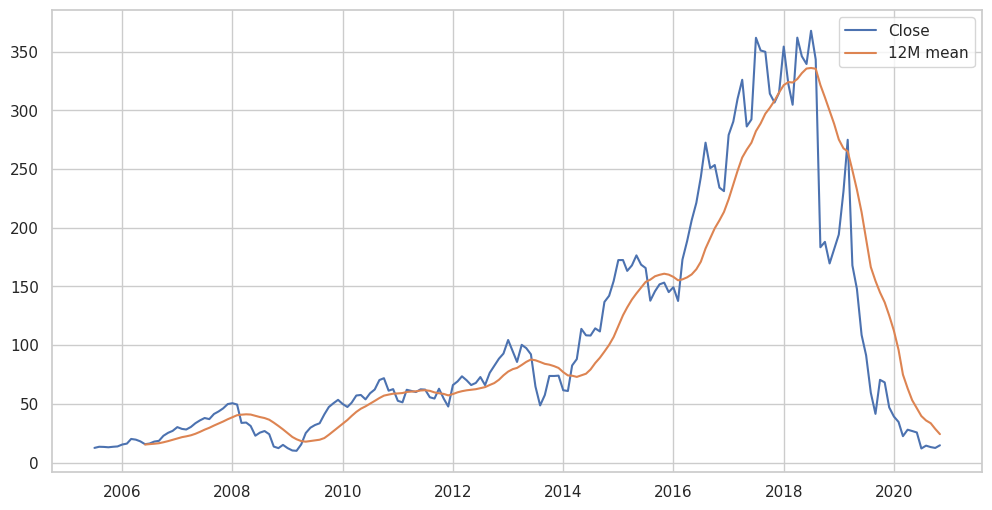

In [ ]:
# ---------------------------
# 3. Quick EDA checks
# ---------------------------
# Plot Close
plt.figure()
plt.plot(clean['Close'], marker='o')
plt.title("Yes Bank Close Price (monthly)")
plt.show()

# Rolling stats
clean['Rolling_Mean'] = clean['Close'].rolling(12).mean()
clean['Rolling_Std']  = clean['Close'].rolling(12).std()

plt.figure()
plt.plot(clean['Close'], label='Close')
plt.plot(clean['Rolling_Mean'], label='12M mean')
plt.legend()
plt.show()


📌 Analysis for Feature: Open


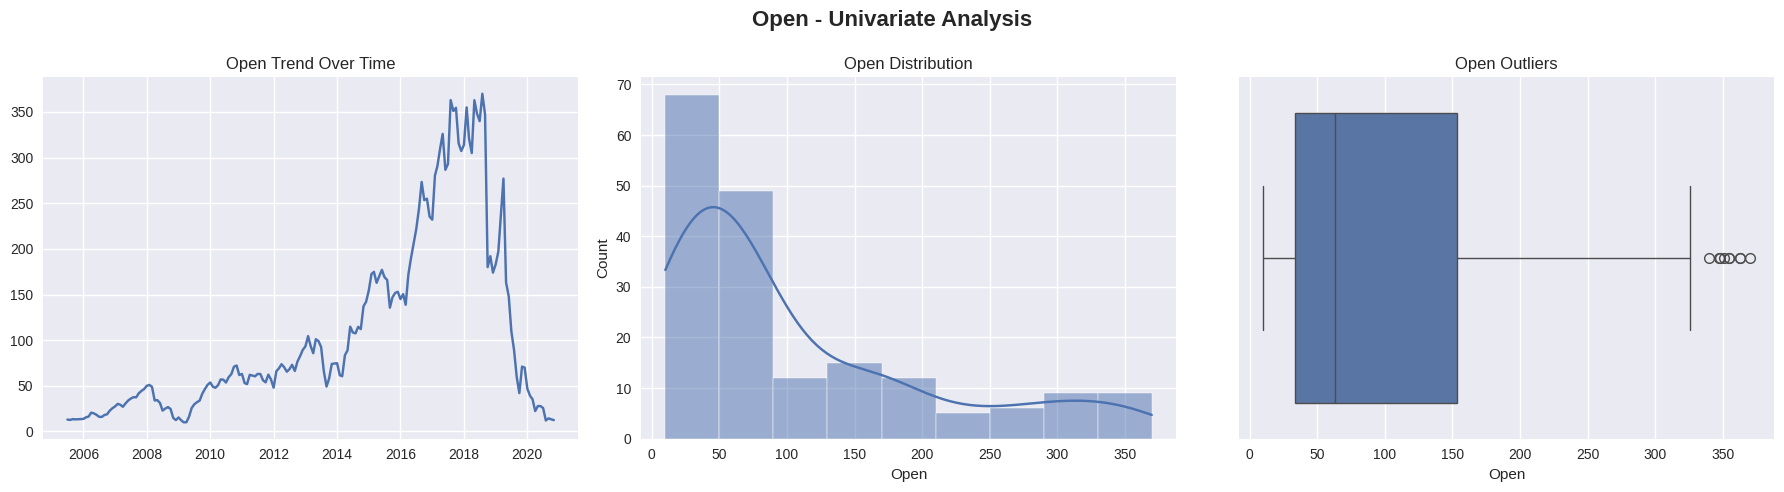


📌 Analysis for Feature: High


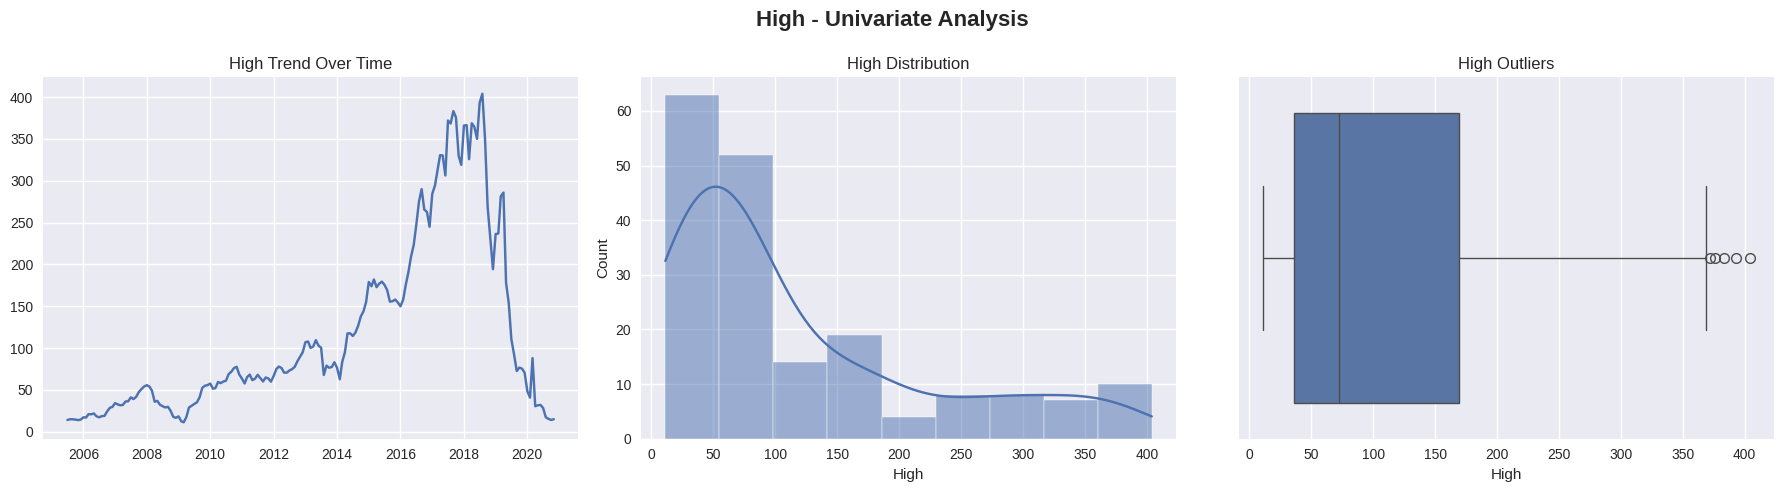


📌 Analysis for Feature: Low


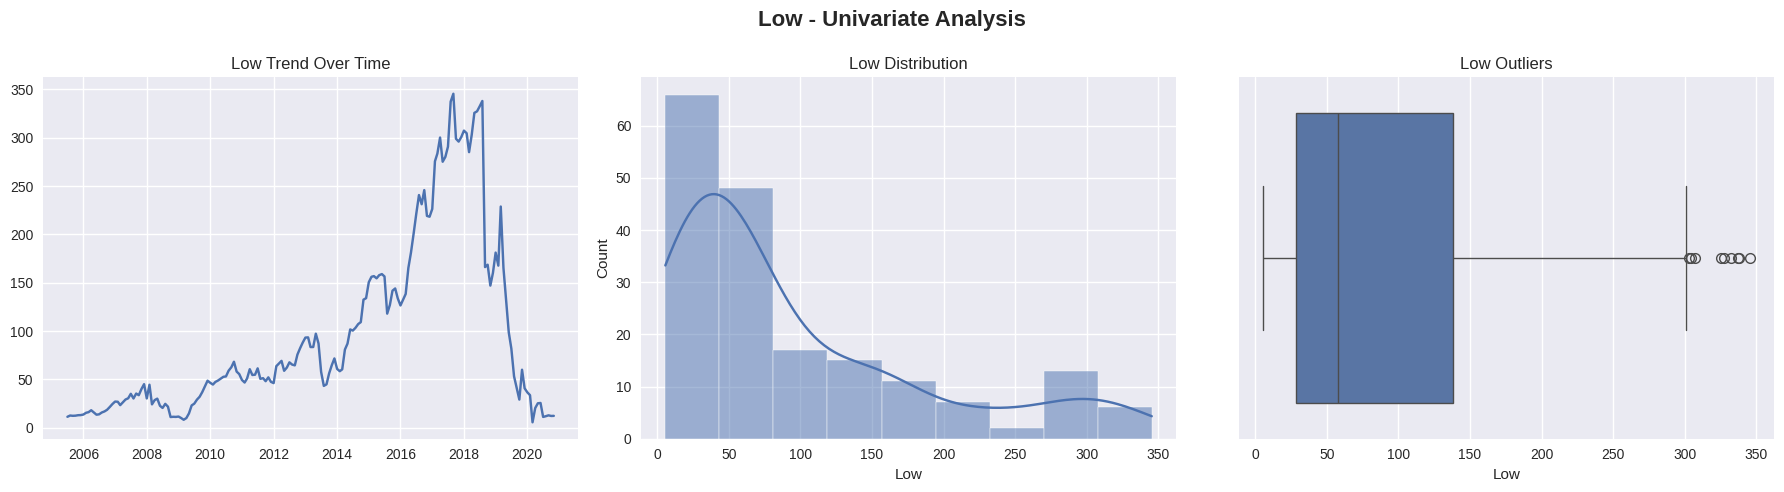


📌 Analysis for Feature: Close


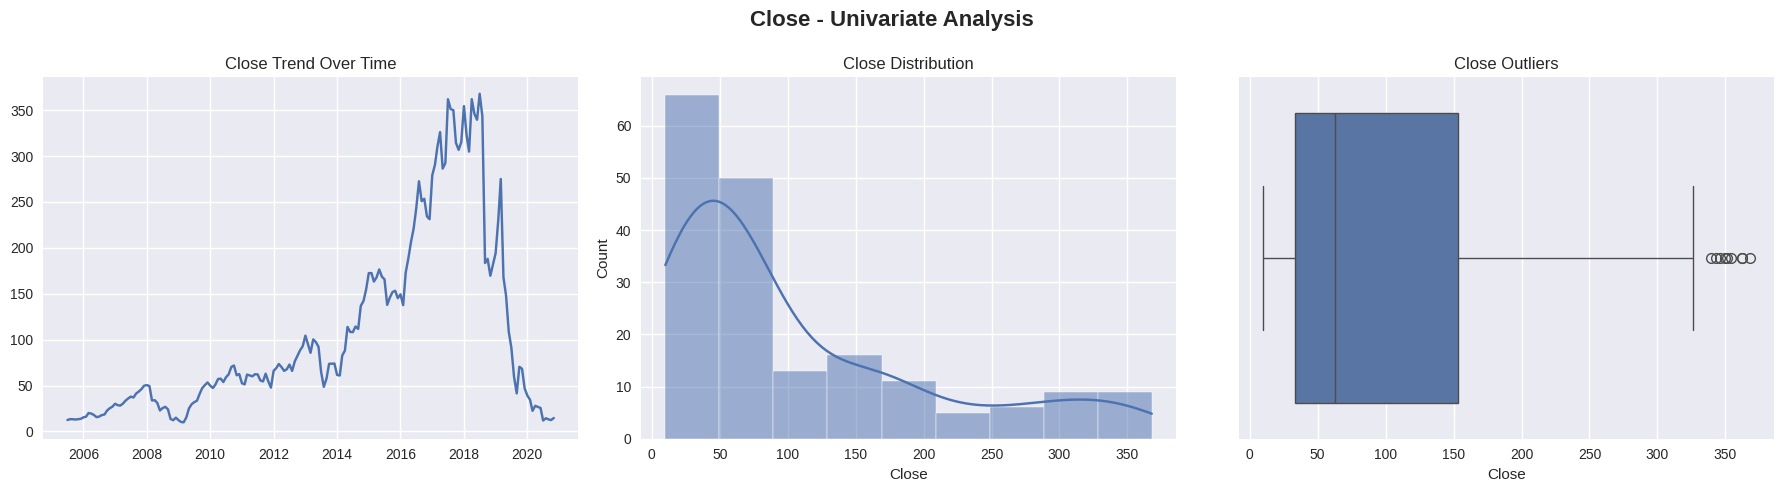

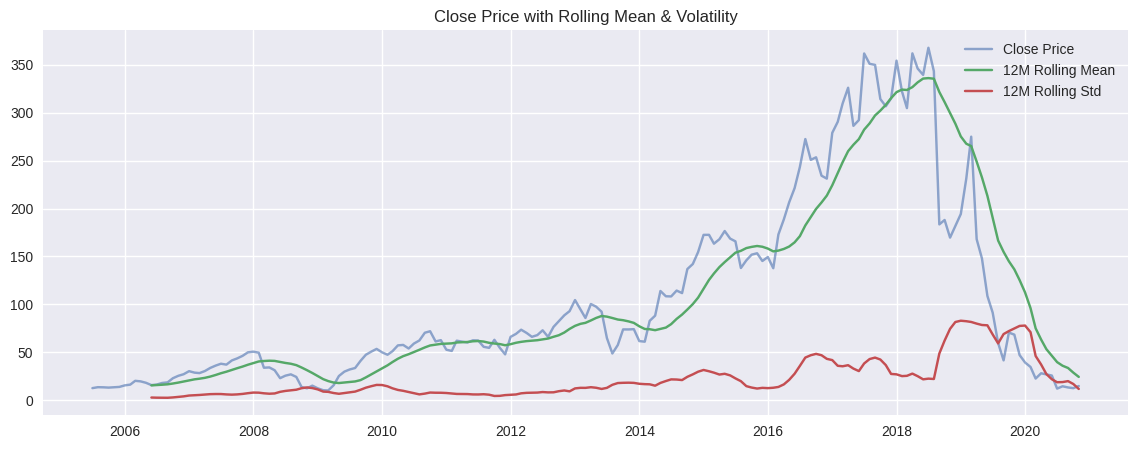

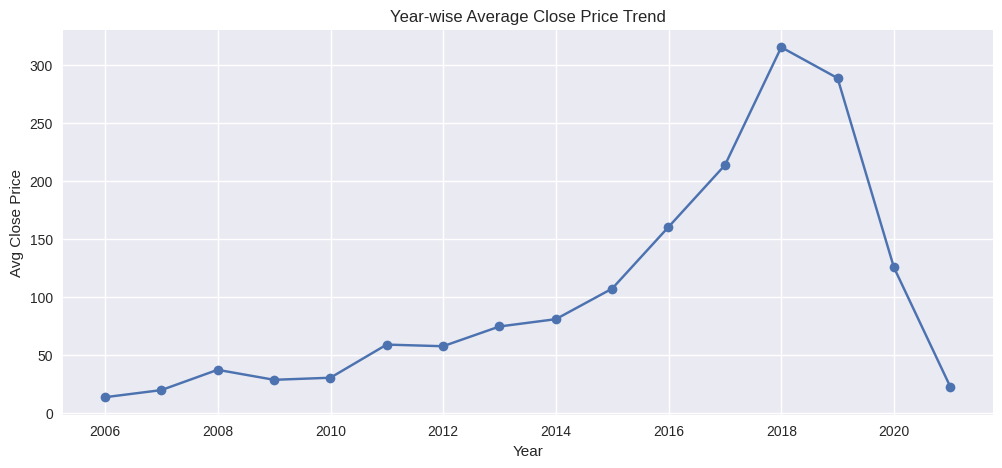

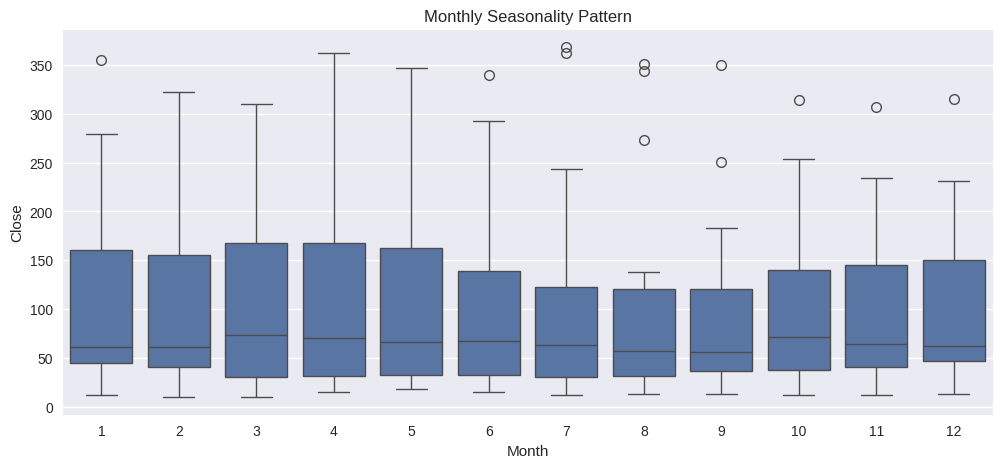

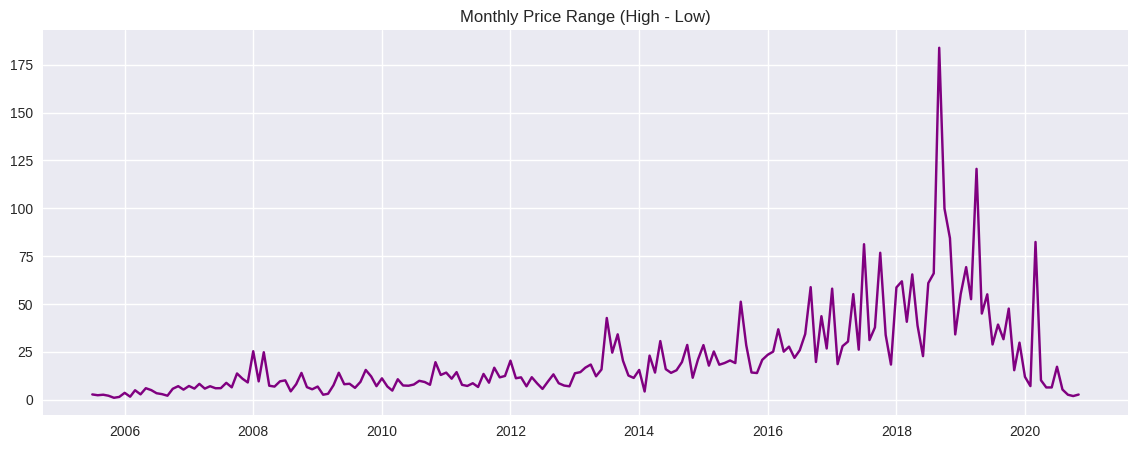

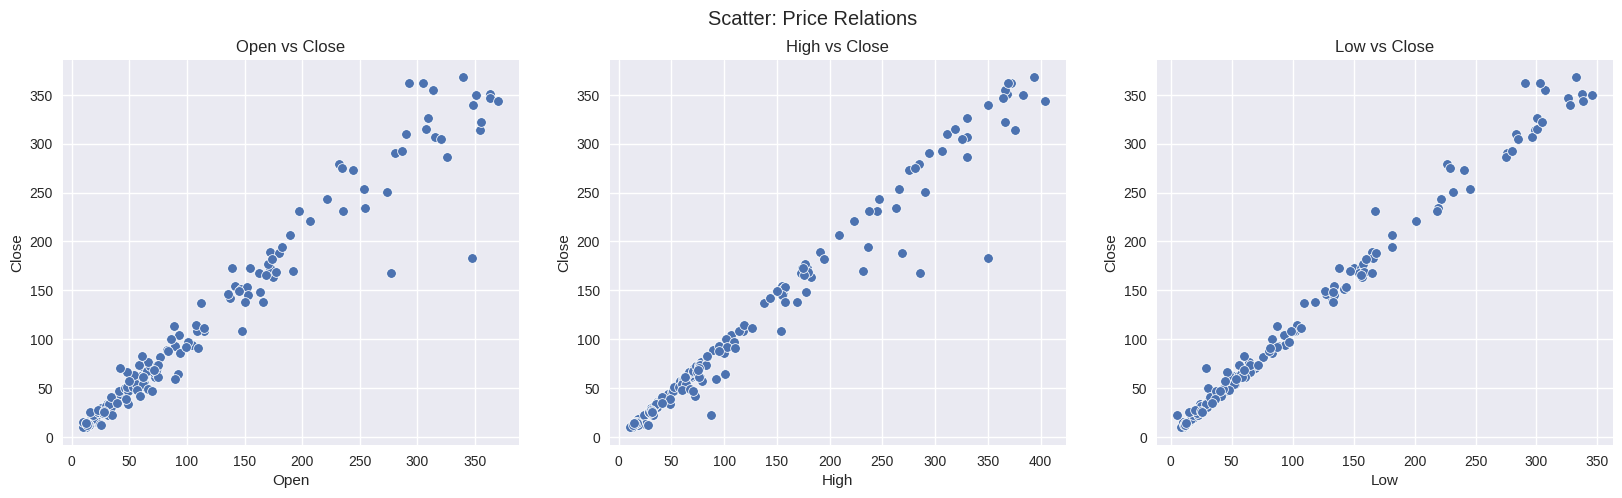

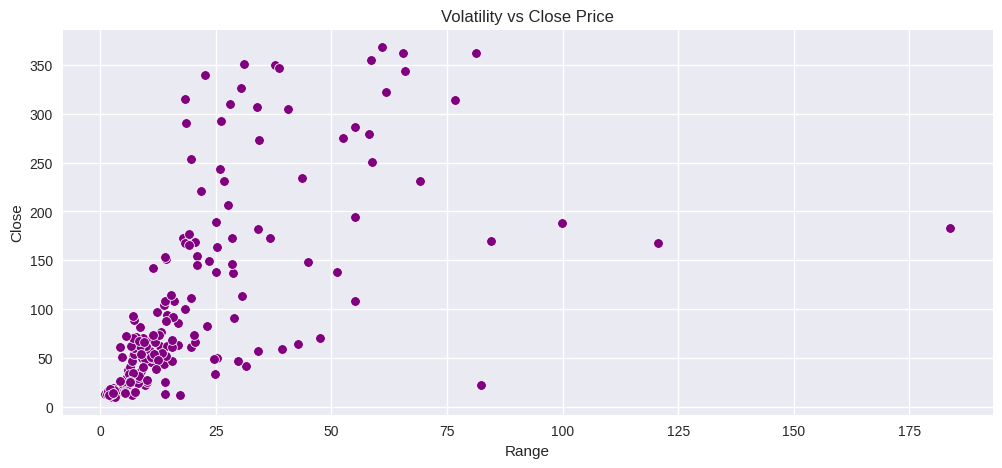

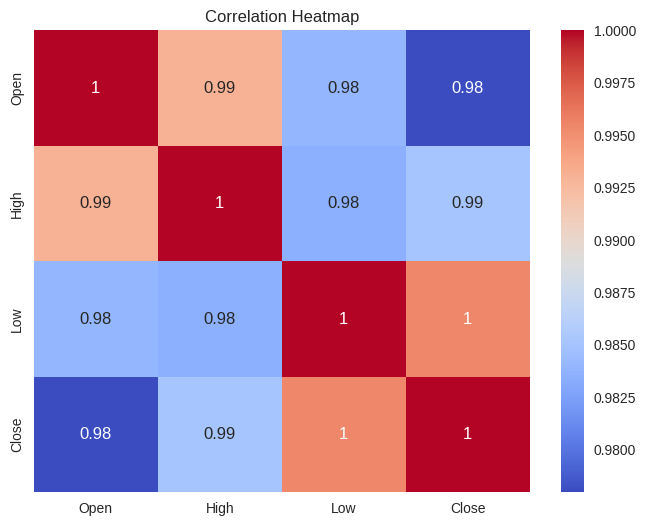

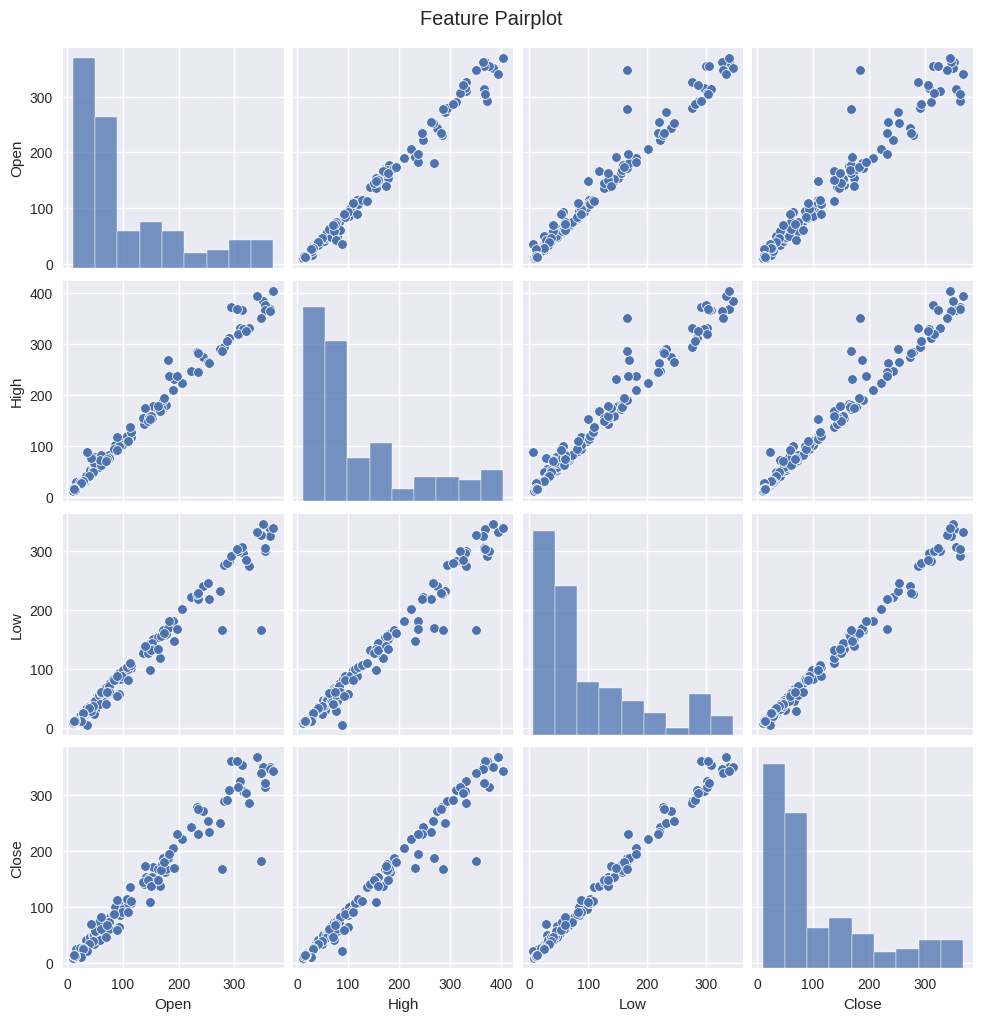

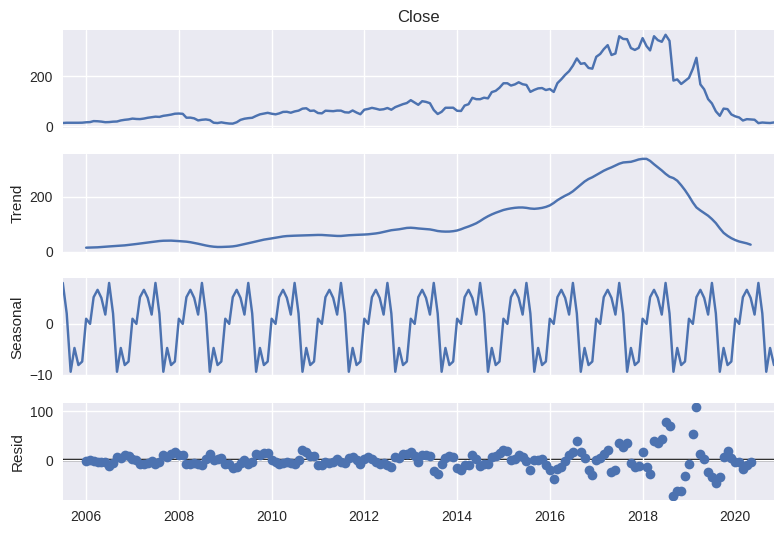

<Figure size 1200x500 with 0 Axes>

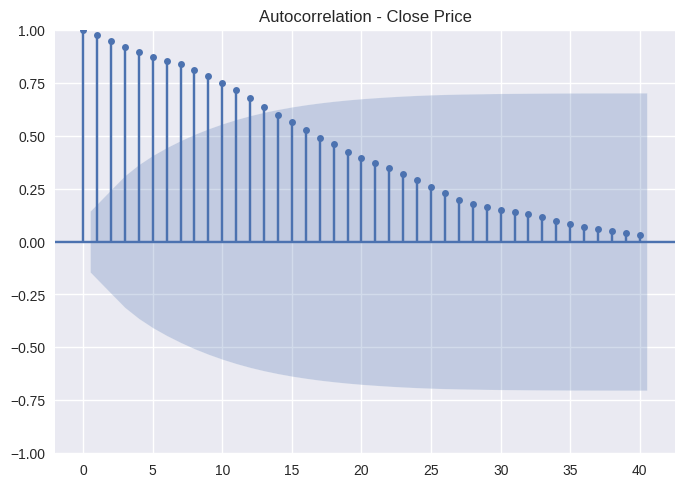

<Figure size 1200x500 with 0 Axes>

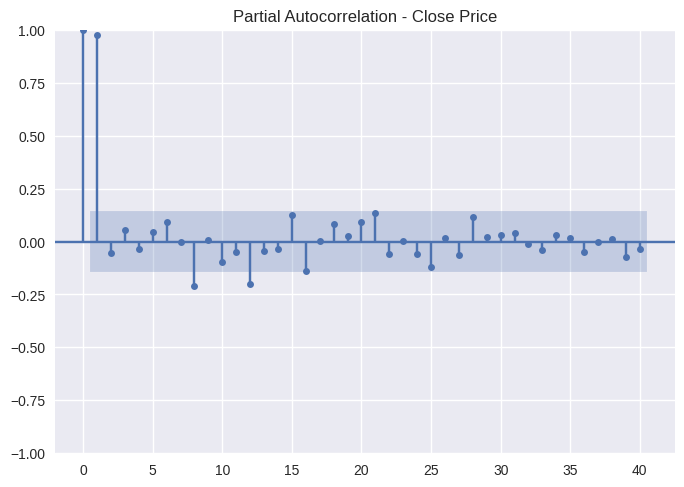

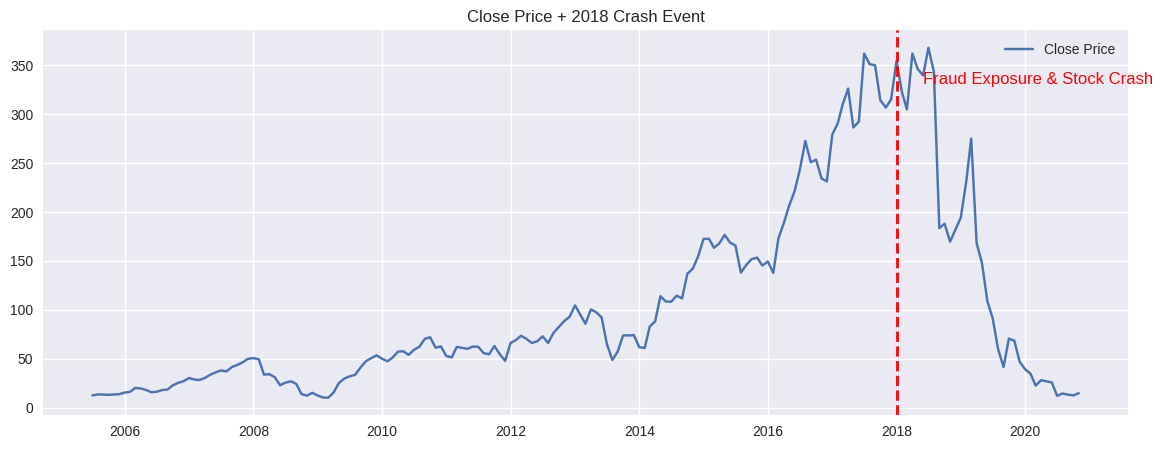

In [ ]:
# ==============================
# FULL EDA VISUALIZATION CODE
# ==============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#  Load Cleaned Data
df = pd.read_csv("data.csv", parse_dates=True, index_col="Date")


#  Latest matplotlib style
plt.style.use("seaborn-v0_8")

columns = ['Open', 'High', 'Low', 'Close']

# ===================================================
# 1️ Univariate Analysis for all Price Features
# ===================================================
for col in columns:
    print(f"\n📌 Analysis for Feature: {col}")

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"{col} - Univariate Analysis", fontsize=16, fontweight='bold')

    axes[0].plot(df.index, df[col])
    axes[0].set_title(f"{col} Trend Over Time")

    sns.histplot(df[col], kde=True, ax=axes[1])
    axes[1].set_title(f"{col} Distribution")

    sns.boxplot(x=df[col], ax=axes[2])
    axes[2].set_title(f"{col} Outliers")

    plt.tight_layout()
    plt.show()

# ================================================
# 2 Rolling Trend & Volatility
# ================================================
df['Rolling_Mean'] = df['Close'].rolling(12).mean()
df['Rolling_Std'] = df['Close'].rolling(12).std()

plt.figure(figsize=(14,5))
plt.plot(df['Close'], label='Close Price', alpha=0.6)
plt.plot(df['Rolling_Mean'], label='12M Rolling Mean')
plt.plot(df['Rolling_Std'], label='12M Rolling Std')
plt.title("Close Price with Rolling Mean & Volatility")
plt.legend()
plt.show()

# ================================================
# 3️ Yearly Trend
# ================================================
df_yearly = df['Close'].resample('Y').mean()

plt.figure(figsize=(12,5))
plt.plot(df_yearly.index, df_yearly, marker='o')
plt.title("Year-wise Average Close Price Trend")
plt.xlabel("Year")
plt.ylabel("Avg Close Price")
plt.grid(True)
plt.show()

# ================================================
# 4️ Monthly Seasonality
# ================================================
df['Month'] = df.index.month

plt.figure(figsize=(12,5))
sns.boxplot(x='Month', y='Close', data=df)
plt.title("Monthly Seasonality Pattern")
plt.show()

# ================================================
# 5️ Price Range (Volatility)
# ================================================
df['Range'] = df['High'] - df['Low']

plt.figure(figsize=(14,5))
plt.plot(df.index, df['Range'], color='purple')
plt.title("Monthly Price Range (High - Low)")
plt.grid(True)
plt.show()

# ================================================
# 6️ Feature Relationship (Scatter Plots)
# ================================================
features = ['Open', 'High', 'Low']
fig, axes = plt.subplots(1, 3, figsize=(20,5))
for i, col in enumerate(features):
    sns.scatterplot(x=df[col], y=df['Close'], ax=axes[i])
    axes[i].set_title(f"{col} vs Close")

plt.suptitle("Scatter: Price Relations")
plt.show()

plt.figure(figsize=(12,5))
sns.scatterplot(x=df['Range'], y=df['Close'], color="purple")
plt.title("Volatility vs Close Price")
plt.grid(True)
plt.show()

# ================================================
# 7️ Correlations
# ================================================
plt.figure(figsize=(8,6))
sns.heatmap(df[['Open','High','Low','Close']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[['Open','High','Low','Close']])
plt.suptitle("Feature Pairplot", y=1.02)
plt.show()

# ================================================
# 8️ Seasonal Decomposition
# ================================================
decomp = seasonal_decompose(df['Close'], model='additive', period=12)
decomp.plot()
plt.show()

# ================================================
# 9️ ACF / PACF (Time-Series Dependency)
# ================================================
plt.figure(figsize=(12,5))
plot_acf(df['Close'], lags=40)
plt.title("Autocorrelation - Close Price")
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(df['Close'], lags=40, method='ywm')
plt.title("Partial Autocorrelation - Close Price")
plt.show()

# ================================================
# 10 Major Event Marking (Yes Bank Crisis 2018)
# ================================================
plt.figure(figsize=(14,5))
plt.plot(df['Close'], label='Close Price')

plt.axvline(pd.to_datetime('2018-01-01'), color='red', linestyle='--', linewidth=2)
plt.text(pd.to_datetime('2018-06-01'), df['Close'].max()*0.9,
         'Fraud Exposure & Stock Crash', color='red')

plt.title("Close Price + 2018 Crash Event")
plt.legend()
plt.grid(True)
plt.show()


**4. Stationarity test (ADF)**

In [ ]:
# ---------------------------
# 4. Stationarity test (ADF)
# ---------------------------
from statsmodels.tsa.stattools import adfuller

ts = clean['Close']
adf = adfuller(ts.dropna())
print("\nADF Statistic:", adf[0], " p-value:", adf[1])
for k,v in adf[4].items():
    print("Crit value",k,":",v)

# log diff check
clean['Log_Close'] = np.log(clean['Close'])
clean['Log_Close_diff'] = clean['Log_Close'].diff()
adf2 = adfuller(clean['Log_Close_diff'].dropna())
print("\nADF on log-diff p-value:", adf2[1])



ADF Statistic: -1.906409141172657  p-value: 0.3290520815004394
Crit value 1% : -3.469413468959902
Crit value 5% : -2.8786964197028295
Crit value 10% : -2.5759166089965397

ADF on log-diff p-value: 1.286111282973521e-21


**5. ARIMA**

In [ ]:
# ---------------------------
# 5. ARIMA
# ---------------------------
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split (last 12 months for test)
horizon = 12
train_ts = ts.iloc[:-horizon].copy()
test_ts  = ts.iloc[-horizon:].copy()

print("\nTrain/Test lengths:", len(train_ts), len(test_ts))

# Fit ARIMA on train (use order (1,1,1) as before)
arima_order = (1,1,1)
arima_model = ARIMA(train_ts, order=arima_order).fit()
print("\nARIMA(train) summary:")
print(arima_model.summary())


Train/Test lengths: 173 12

ARIMA(train) summary:


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  173
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -764.292
Date:                Mon, 03 Nov 2025   AIC                           1534.585
Time:                        17:50:53   BIC                           1544.027
Sample:                    07-01-2005   HQIC                          1538.416
                         - 11-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8160      0.052    -15.771      0.000      -0.917      -0.715
ma.L1          0.9478      0.027     35.522      0.000       0.896       1.000
sigma2       422.7669     20.126     21.006      0.0

In [ ]:
# Forecast on test
fc_test = arima_model.forecast(steps=horizon)
fc_test.index = test_ts.index
mae = mean_absolute_error(test_ts, fc_test)
rmse = np.sqrt(mean_squared_error(test_ts, fc_test))
mape = np.mean(np.abs((test_ts - fc_test) / test_ts)) * 100

print(f"\nARIMA Test Performance — MAE={mae:.3f}, RMSE={rmse:.3f}, MAPE={mape:.2f}%")


ARIMA Test Performance — MAE=44.874, RMSE=46.200, MAPE=251.07%


In [ ]:
# Refit on full dataset to get future forecast
arima_full = ARIMA(ts, order=arima_order).fit()
future_steps = 12
future_fc = arima_full.forecast(steps=future_steps)
future_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(), periods=future_steps, freq='MS')
future_fc.index = future_index

print("\nFuture forecast (ARIMA):")
print(future_fc)


Future forecast (ARIMA):
2020-12-01    13.718350
2021-01-01    14.495405
2021-02-01    13.860913
2021-03-01    14.378997
2021-04-01    13.955963
2021-05-01    14.301385
2021-06-01    14.019336
2021-07-01    14.249639
2021-08-01    14.061589
2021-09-01    14.215138
2021-10-01    14.089760
2021-11-01    14.192135
Freq: MS, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


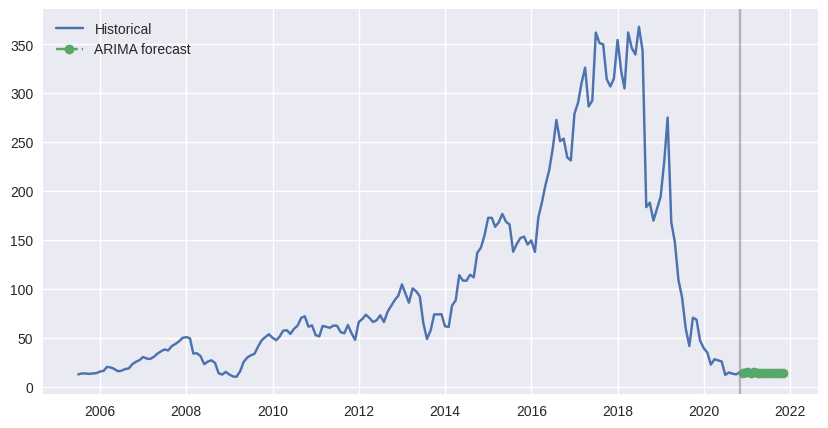

In [ ]:
# Plot historical + future
plt.figure(figsize=(10,5))
plt.plot(ts, label='Historical')
plt.plot(future_fc, label='ARIMA forecast', linestyle='--', marker='o')
plt.axvline(ts.index[-1], color='gray', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
# Save ARIMA model for Streamlit
import joblib
joblib.dump(arima_full, "arima_model.pkl")
print("\nSaved arima_model.pkl")
# ✅ Save cleaned historical data for Streamlit
ts_df = ts.reset_index()
ts_df.columns = ["Date", "Close"]  # Proper column names for app
ts_df.to_csv("data.csv", index=False)  # ✅ Streamlit will load this

print("✅ Saved data.csv for Streamlit")



Saved arima_model.pkl
✅ Saved data.csv for Streamlit


**6. ML Models**

In [ ]:
# ---------------------------
# 6. Minimal feature engineering for ML
# ---------------------------
df = clean.copy()  # working copy with Close + optional OHLC

# Month / Year / Range
df['Month'] = df.index.month
df['Year']  = df.index.year
if 'High' in df.columns and 'Low' in df.columns:
    df['Range'] = df['High'] - df['Low']
else:
    df['Range'] = df['Close'].rolling(3).std().fillna(0.0)

# lags and rolling means
df['Lag1'] = df['Close'].shift(1)
df['Lag2'] = df['Close'].shift(2)
df['RollMean3'] = df['Close'].rolling(window=3).mean()

# drop NaN rows created by shift/rolling
df = df.dropna().copy()
print("\nAfter feature creation shape:", df.shape)

# Train/test split aligned with ARIMA (last horizon rows are test)
train_ml = df.iloc[:-horizon].copy()
test_ml  = df.iloc[-horizon:].copy()

features = ['Month','Year','Range','Lag1','Lag2','RollMean3']
X_train = train_ml[features].copy()
y_train = train_ml['Close'].copy()
X_test  = test_ml[features].copy()
y_test  = test_ml['Close'].copy()

# scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

print("X_train_scaled shape:", X_train_scaled.shape, "X_test_scaled shape:", X_test_scaled.shape)



After feature creation shape: (174, 14)
X_train_scaled shape: (162, 6) X_test_scaled shape: (12, 6)


In [ ]:
# ---------------------------
# 7. Train ML models (RF, XGB, SVR) with safe import handling
# ---------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

models = {}
models['Linear'] = LinearRegression()
models['RandomForest'] = RandomForestRegressor(n_estimators=200, random_state=42)

# try xgboost; if not available, skip it
try:
    from xgboost import XGBRegressor
    models['XGBoost'] = XGBRegressor(objective='reg:squarederror', n_estimators=300, random_state=42)
except Exception as e:
    print("XGBoost not available:", e)

models['SVR'] = SVR(kernel='rbf')

results = []
predictions = {}

for name, mdl in models.items():
    try:
        mdl.fit(X_train_scaled.values, y_train.values)
        preds = mdl.predict(X_test_scaled.values)
        predictions[name] = preds
        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        mape = np.mean(np.abs((y_test - preds) / y_test))*100
        results.append([name, mae, rmse, mape])
        print(f"\n{name} done. RMSE={rmse:.4f}")
    except Exception as e:
        print(f"\n{name} training/prediction error:", e)

results_df = pd.DataFrame(results, columns=['Model','MAE','RMSE','MAPE (%)']).set_index('Model')
print("\nML results:\n", results_df)

# Choose best ML model among RandomForest and XGBoost if present (exclude Linear if you want)
candidates = [m for m in ['RandomForest','XGBoost'] if m in models]
if not candidates:
    best_ml_name = 'Linear'
else:
    # choose lowest RMSE among candidates
    best_ml_name = results_df.loc[candidates]['RMSE'].idxmin()

best_ml = models[best_ml_name]
print("\nBest ML model chosen:", best_ml_name)

# Save best ML model & scaler & feature order
joblib.dump(best_ml, "best_ml_model.pkl")
joblib.dump(scaler, "scaler.pkl")
import json
json.dump(features, open("feature_cols.json","w"))
print("Saved best_ml_model.pkl, scaler.pkl, feature_cols.json")


Linear done. RMSE=0.0000

RandomForest done. RMSE=7.6599

XGBoost done. RMSE=8.5332

SVR done. RMSE=64.2915

ML results:
                        MAE          RMSE      MAPE (%)
Model                                                 
Linear        7.608728e-14  9.189106e-14  3.564584e-13
RandomForest  5.359929e+00  7.659877e+00  2.158617e+01
XGBoost       6.346966e+00  8.533177e+00  3.014076e+01
SVR           6.356617e+01  6.429151e+01  3.428513e+02

Best ML model chosen: RandomForest
Saved best_ml_model.pkl, scaler.pkl, feature_cols.json


In [ ]:
# ---------------------------
# 8. Safe recursive ML forecast (keeps scaler/feature order correct)
# ---------------------------
# We'll build future features iteratively using last known real closes.
steps = 12
last_real = df['Close'].iloc[-2:].tolist()  # [prev2, prev1]
# if not enough history, pad with last value
while len(last_real) < 2:
    last_real.insert(0, last_real[-1])

future_dates = pd.date_range(start=df.index[-1] + pd.offsets.MonthBegin(), periods=steps, freq='MS')

future_preds = []
# Start from last real row of feature values (unscaled)
base_row = df[features].iloc[-1:].copy()  # single-row DataFrame
for i, dt in enumerate(future_dates):
    # prepare feature row
    lag1 = last_real[-1]
    lag2 = last_real[-2]
    rollmean3 = np.mean([lag1, lag2, lag1])  # approximate initial rollmean; will update after we get pred

    row = base_row.copy()
    row['Lag1'].iloc[0] = lag1
    row['Lag2'].iloc[0] = lag2
    row['RollMean3'].iloc[0] = rollmean3
    row['Month'].iloc[0] = dt.month
    row['Year'].iloc[0]  = dt.year
    # Scale and predict
    scaled = scaler.transform(row[features])
    pred = best_ml.predict(scaled)[0]
    future_preds.append(pred)

    # update last_real for next iteration
    last_real.append(pred)
    last_real.pop(0)

    # update base_row (for any constant features if necessary)
    # Keep base_row as last feature template (not strictly necessary)
    # ensure base_row remains DataFrame with same columns for next iteration

future_forecast_ml = pd.Series(future_preds, index=future_dates)
print("\nML future forecast (12 mo):")
print(future_forecast_ml)



ML future forecast (12 mo):
2020-12-01    14.60220
2021-01-01    12.89485
2021-02-01    12.22340
2021-03-01    11.52030
2021-04-01    13.29970
2021-05-01    13.56065
2021-06-01    13.91115
2021-07-01    14.06615
2021-08-01    14.12260
2021-09-01    14.15260
2021-10-01    14.05005
2021-11-01    14.01640
Freq: MS, dtype: float64


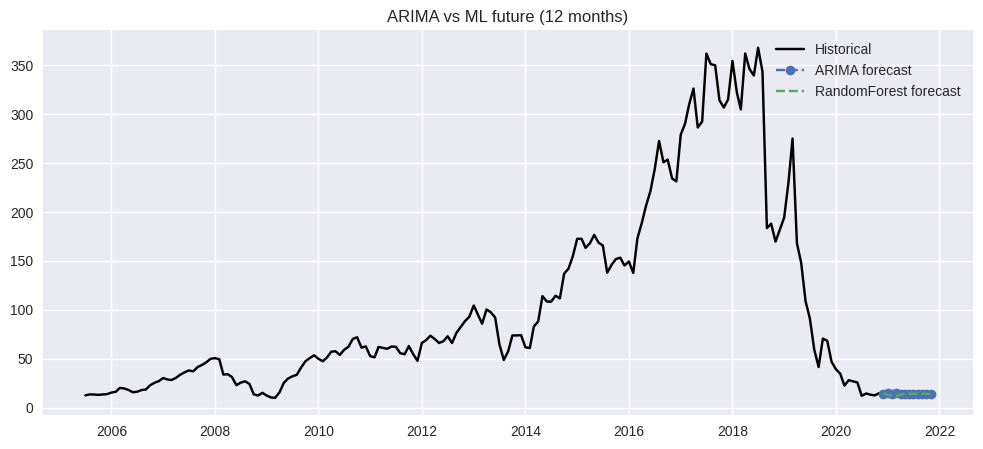


Saved future_ml_forecast.csv and future_arima_forecast.csv


In [ ]:
# ---------------------------
# 9. Comparison plots & final outputs
# ---------------------------
plt.figure(figsize=(12,5))
plt.plot(ts, label='Historical', color='black')
plt.plot(future_fc, label='ARIMA forecast', linestyle='--', marker='o')
plt.plot(future_forecast_ml, label=f'{best_ml_name} forecast', linestyle='--', marker='x')
plt.legend()
plt.title("ARIMA vs ML future (12 months)")
plt.show()

# save ML forecast to csv for inspection
future_forecast_ml.reset_index().rename(columns={'index':'Date',0:'Pred'}).to_csv("future_ml_forecast.csv", index=False)
future_fc.reset_index().rename(columns={'index':'Date',0:'Pred'}).to_csv("future_arima_forecast.csv", index=False)

print("\nSaved future_ml_forecast.csv and future_arima_forecast.csv")

**7. Streamlit deployement**

In [ ]:
# ✅ Final Streamlit Export Block (Clean & Minimal)
import joblib
import pandas as pd
import os

# Ensure folder exists
os.makedirs("/content/models", exist_ok=True)

# ✅ Save ARIMA Model (only model needed now)
joblib.dump(arima_model, "/content/models/arima_model.pkl")
print("✅ ARIMA Model Saved")

# ✅ Save clean dataset for Streamlit
df_reset = df.copy()
df_reset = df_reset.reset_index().rename(columns={"index": "Date"})
df_reset.to_csv("/content/models/data.csv", index=False)
print("✅ Data CSV Saved")

print("\n🎯 Files ready for download from: /content/models/")



✅ ARIMA Model Saved
✅ Data CSV Saved

🎯 Files ready for download from: /content/models/


In [ ]:
# from google.colab import files

# # ✅ Download files to your computer
# files.download("/content/models/arima_model.pkl")
# files.download("/content/models/data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***